Testing Spatio-Centric Variogram

In [38]:
#Cargando librerías 

import importlib
import positioning_sensors as ps
importlib.reload(ps)

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np


plt.style.use("ggplot")

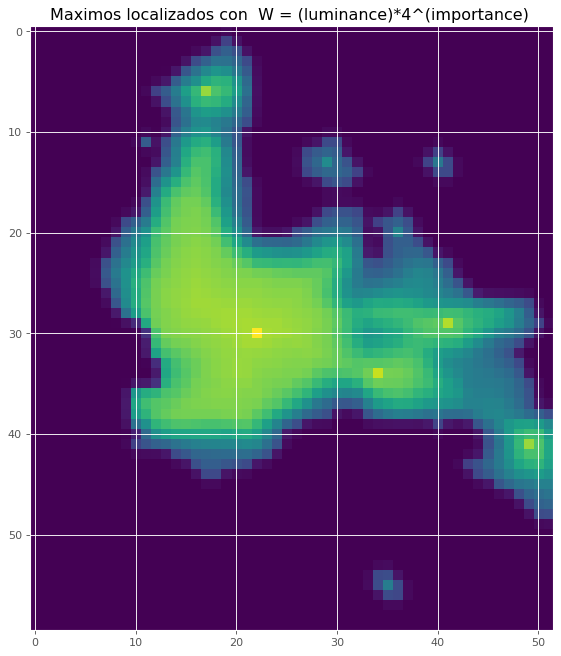

In [39]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

luminance = ps.readIMG(ilumina)
importance = ps.readIMG(niveles,invert=True)

nonsat = ps.desaturate(luminance,th=62)
nonsat = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')


seeds = ps.getMax(nonsat)

seeds_nonsat = ps.getMax(nonsat)
coords_nonsat = ps.get_coords(seeds_nonsat)

plt.figure(figsize=(10, 10), dpi=80)

plt.imshow(seeds*np.mean(nonsat)/1.5+nonsat)
plt.title("Maximos localizados con  W = (luminance)*4^(importance) ")
plt.show()

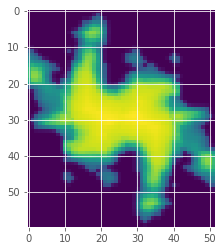

In [40]:
z = np.zeros((2,seeds_nonsat.shape[0],seeds_nonsat.shape[1]))
z[0] = nonsat
z[1] = np.flip(nonsat)


plt.imshow(np.max(z,axis=0))
#plt.imshow(z[])

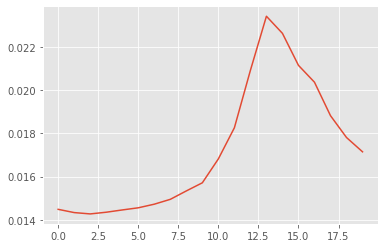

In [41]:

plt.plot(((1/(1+z[0]))*(nonsat>0))[30][20:40])


In [46]:
cix = 6
direction = 0
atol = 10
S = nonsat

coords = ps.get_coords(seeds)
dy = coords[cix][0]
dx = coords[cix][1]

mask = ps.getOrientationMask(direction,atol,S,dx,dy)
p = coords[cix]
S = nonsat
sc = ps.makeSpatialScatter(p,mask,S)
accum = ps.variogram(sc)



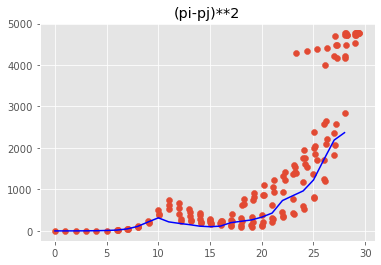

In [65]:
#plt.imshow(mask*nonsat)
#plt.show()
plt.scatter(sc[:,0],sc[:,1])
plt.title("(pi-pj)**2")
plt.plot(accum, color="blue")

plt.show()


In [48]:
radio = ps.getMaxRadio(accum,max_var)
max_var = ps.getMaximumVariance(nonsat,0.5)
radio = ps.getMaxRadio(accum,max_var)  
radio

6

In [49]:
th = 100
S = nonsat.flatten()
S_flatten = S.flatten()
vmax = np.max(S_flatten)
vmin = np.min(S_flatten)
vrange = (vmax-vmin)**2/2
max_var = th * vrange/100

In [116]:
100*(accum[5]/max_var)
accum[5]

10.934982561758915

In [50]:
mshape = nonsat
a,b = ps.fillArea(p,accum,radio,direction,mshape.shape)

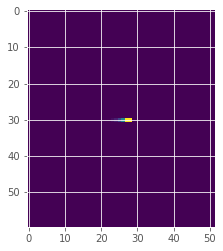

In [51]:
plt.imshow(a)